# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

*Решение:*

При классификации конкретного объекта всего возможно $8$ исходов в поведении $b1$, $b2$, $b3$. Изобразим их в таблице. Первые $3$ столбца описывают ответы алгоритмов: $0$ - классификатор не угадал класс, $1$ - определил правильно. 

Последние два столбца таким же образом иллюстрируют результат работы нашей композиции.

Пример построения на основе $3$ строки:
В первом случае мы выбрали класс, за который проголосовали $b1$ и $b3$ ($w_1 + w_3 > w_2$) и ошиблись, т.к. они выбирали неправильный. Во втором - выбрали правильный класс, за который голосовал $b2$ ($w_2 > w_1 + w_3$), поэтому в $Res2$ ставим единицу.

| $b1$ | $b2$ | $b3$ | $Res1$ | $Res2$ |
|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 | 0 |
| 0 | 1 | 0 | 0 | 1 |
| 0 | 1 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 | 0 |
| 1 | 0 | 1 | 1 | 0 |
| 1 | 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 1 | 1 |

Вероятность ошибки - сумма вероятность тех случаев, в которых в результирующем столбце получен $0$.

1. $q = p^3 + 3\,p^2\,(1-p) = 3\,p^2 - 2p^3$
2. $q = p^3 + 2\,p^2\,(1-p) + p\,(1-p)^2 = p$

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

*Решение:*

Определим:

$\mathsf{A}$ - семейства базовых алгоритмов.

$l$ - длина выборки

Окончательный алгоритм ищем в виде суммы базовых $a_N(x) = \sum_{i=1}^N \gamma_i b_i(x)$

Тогда:

$g_i^{(N)} = (-1) \cdot \left.\frac{\partial L(y_i, a)}{\partial a} \right|_{a={a_{N-1}(x_i)}} = \left.\frac{y_i-a}{a(1-a)} \right|_{a={a_{N-1}(x)}}$ - остатки, найденные как антиградиент в точках обучающей выборки


$b_n = \underset{b \in \mathsf{A}}{\arg\min}\sum_{i=1}^l(b(x_i)-g_i^{N})^2$ - аппроксимируя по точкам, ищем $b_n$ лучше всего описывающий $g_i^{(N)}$

$\gamma_n = \underset{\gamma}{\arg\min} \sum_{i=1}^l L(y_i, a_{N-1}(x_i) + \gamma b_N(x_i))$ - для коэффициентов решаем задачу одномерной оптимизации, минимизируя функцию потерь для алгоритма на предыдущем шаге с добавкой от этого шага 


### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

In [ ]:
# Ваш ответ здесь

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [57]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def bagging(X, y, size):
    ind = np.random.randint(size, size=size)
    sample_X, sample_y = X[ind], y[ind]
    return sample_X, sample_y

In [54]:
class RandomForest(BaseEstimator, ClassifierMixin):
    def __init__(self, num_trees, max_depth=np.inf, max_features="sqrt", criterion='gini'):
        self.num_trees = num_trees
        self.max_depth = None if max_depth == np.inf else max_depth
        self.max_features = max_features
        self.criterion = criterion
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        
        self.trees = []
        
        for i in range(self.num_trees):
            self.trees.append(DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth, 
                                                     max_features=self.max_features))
            X, y = bagging(X_train, y_train, size=X_train.shape[0])
            self.trees[i].fit(X, y)
     
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        y_pred_forest = np.zeros((self.num_trees, X_test.shape[0]))
        y_pred = np.zeros(X_test.shape[0])
        
        for i, tree in enumerate(self.trees):
            y_pred_forest[i] = tree.predict(X_test)
        
        for i in range(len(y_pred)):
            y_pred[i] = Counter(y_pred_forest[:, i]).most_common(1)[0][0]
        
        return y_pred

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [23]:
RANDOM_STATE = 42

In [56]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, df.columns != 0].values, df[0].values, 
                                                    test_size=0.2, random_state=RANDOM_STATE)

clf = RandomForest(num_trees=5)
clf.fit(X_train, Y_train)
print("Точность на обучении: ", accuracy_score(Y_train, clf.predict(X_train)))
print("Точность на тесте: ", accuracy_score(Y_test, clf.predict(X_test)))

Точность на обучении:  1.0
Точность на тесте:  0.944444444444


Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

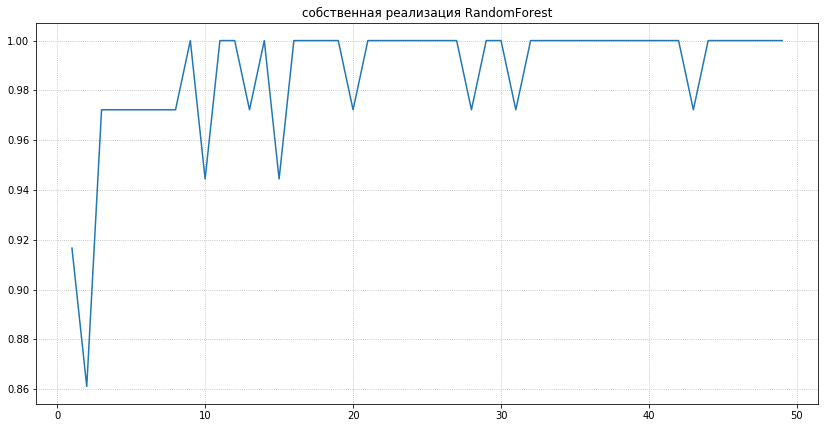

In [63]:
max_trees = 50
scores = []

for num_trees in range(1, max_trees):
    clf = RandomForest(num_trees=num_trees)
    clf.fit(X_train, Y_train)
    scores.append(accuracy_score(Y_test, clf.predict(X_test)))

plt.figure(figsize=(14,7))
plt.plot(range(1, max_trees), scores)
plt.grid(ls=':')
plt.title("собственная реализация RandomForest")
plt.show()

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

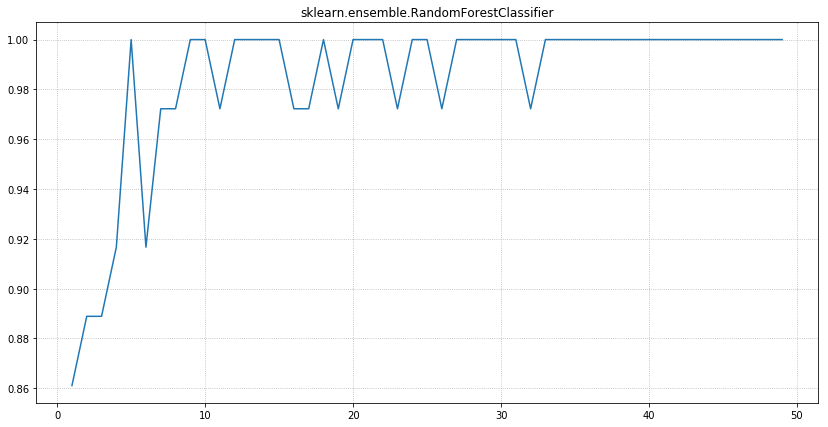

In [65]:
from sklearn.ensemble import RandomForestClassifier

max_trees = 50
scores = []

for num_trees in range(1, max_trees):
    clf = RandomForestClassifier(n_estimators=num_trees)
    clf.fit(X_train, Y_train)
    scores.append(accuracy_score(Y_test, clf.predict(X_test)))

plt.figure(figsize=(14,7))
plt.plot(range(1, max_trees), scores)
plt.grid(ls=':')
plt.title("sklearn.ensemble.RandomForestClassifier")
plt.show()

Качества работы моей и библиотечной реализации практически совпадают. "Впадины", скорее всего характеризуют переобучение, когда наши построенные деревья получились слишком скоррелированы.

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

In [71]:
import random

In [99]:
class RandomForestModified(RandomForest):
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        
        if isinstance(self.max_features, int):
            pass
        elif isinstance(self.max_features, float):
            self.max_features = int(self.max_features * X_train.shape[1])
        elif self.max_features is None:
            self.max_features = X_train.shape[1]
        elif self.max_features == "sqrt":
            self.max_features = int(np.sqrt(X_train.shape[1]))
        elif self.max_features == "log2":
            self.max_features == int(np.log2(X_train.shape[1]))
            
        self.trees = []
        self.features = []
        
        for i in range(self.num_trees):
            self.features.append(random.sample(range(X_train.shape[1]), self.max_features))
            X_train_small = X_train[:, self.features[i]]
            self.trees.append(DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth))
            X, y = bagging(X_train_small, y_train, size=X_train.shape[0])
            self.trees[i].fit(X, y)
        
        return self

    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        y_pred_forest = np.zeros((self.num_trees, X_test.shape[0]))
        y_pred = np.zeros(X_test.shape[0])
        
        for i, tree in enumerate(self.trees):
            y_pred_forest[i] = tree.predict(X_test[:, self.features[i]])
        
        for i in range(len(y_pred)):
            y_pred[i] = Counter(y_pred_forest[:, i]).most_common(1)[0][0]
        
        return y_pred

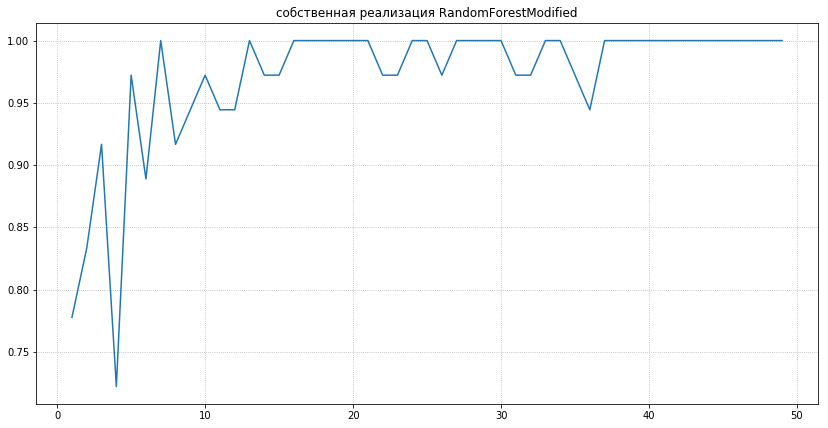

In [101]:
max_trees = 50
scores = []

for num_trees in range(1, max_trees):
    clf = RandomForestModified(num_trees=num_trees)
    clf.fit(X_train, Y_train)
    scores.append(accuracy_score(Y_test, clf.predict(X_test)))

plt.figure(figsize=(14,7))
plt.plot(range(1, max_trees), scores)
plt.grid(ls=':')
plt.title("собственная реализация RandomForestModified")
plt.show()

Точность практически не изменилась. Мы все так же выходим на $1$. Возможно, увеличились эффекты переобучения - количество отклонений от ассимптотического значения (выше - "впадины"). Но, наверно, выборка слишком мала, чтобы делать такие выводы.